In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [52]:
# initialize input and output directories
input_dir = os.path.join("..", "data", "raw")

# read csv files
train_df = pd.read_csv(os.path.join(input_dir, "train.csv"))
test_df = pd.read_csv(os.path.join(input_dir, "test.csv"))


In [54]:
# get information of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
null_df = pd.DataFrame()
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
print(train_df["Embarked"].value_counts(), "\n")
print(train_df["Sex"].value_counts(), "\n")
print(train_df["Pclass"].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 

Sex
male      577
female    314
Name: count, dtype: int64 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


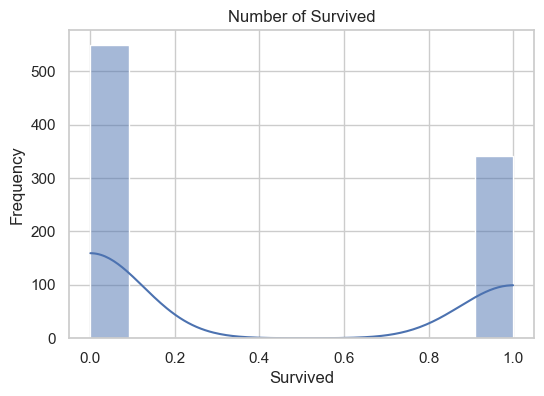

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(x="Survived",kde=True , data=train_df)
plt.title("Number of Survived")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

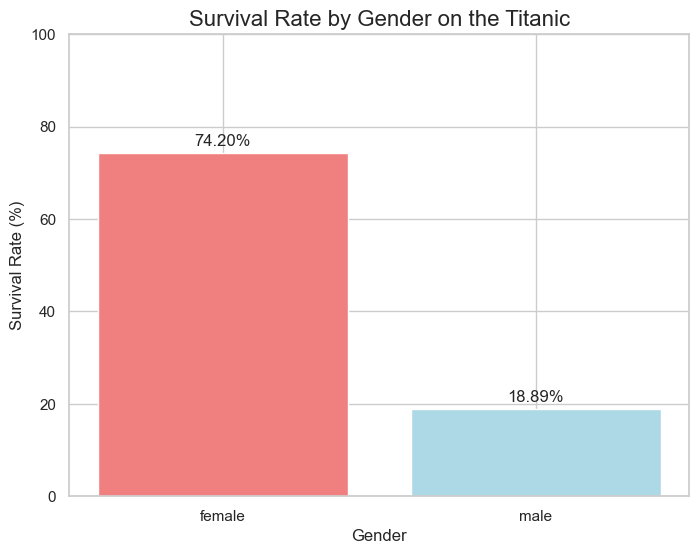

In [59]:
gender_survival_rates = train_df.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
# Create the bar plot
# survival_rates.index will be ['female', 'male']
# survival_rates.values will be the corresponding survival percentages
bars = plt.bar(gender_survival_rates.index, gender_survival_rates.values, color=['lightcoral', 'lightblue'])

# Set the title and labels for clarity
plt.title('Survival Rate by Gender on the Titanic', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)

# Set the y-axis limit to go from 0 to 100 percent
plt.ylim(0, 100)

# Ensure x-axis labels ('female', 'male') are not rotated
plt.xticks(rotation=0)

# Add the percentage labels on top of each bar for better readability
for bar in bars:
    yval = bar.get_height()
    # Place text slightly above the bar, centered horizontally
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

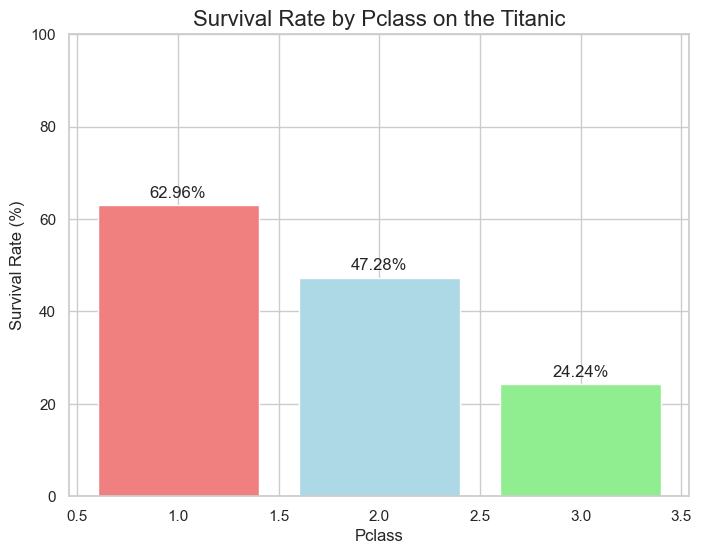

In [60]:
pclass_survived_rate = train_df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(pclass_survived_rate.index, pclass_survived_rate.values, color=['lightcoral', 'lightblue', 'lightgreen'])

# Set the title and labels for clarity
plt.title('Survival Rate by Pclass on the Titanic', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)

# Set the y-axis limit to go from 0 to 100 percent
plt.ylim(0, 100)

# Ensure x-axis labels ('female', 'male') are not rotated
plt.xticks(rotation=0)

# Add the percentage labels on top of each bar for better readability
for bar in bars:
    yval = bar.get_height()
    # Place text slightly above the bar, centered horizontally
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()


In [61]:
# We group by both 'Pclass' and 'Sex' to see how they interact.
# We then calculate the mean of 'Survived' for each subgroup and multiply by 100 for percentage.
interaction_rates = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100

# Print the calculated survival rates in a pivot table-like format for clarity.
# The .unstack() method pivots the 'Sex' index level to become columns.
print("Survival Rates (%) by Passenger Class and Gender:")
print(interaction_rates.unstack())

Survival Rates (%) by Passenger Class and Gender:
Sex        female       male
Pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


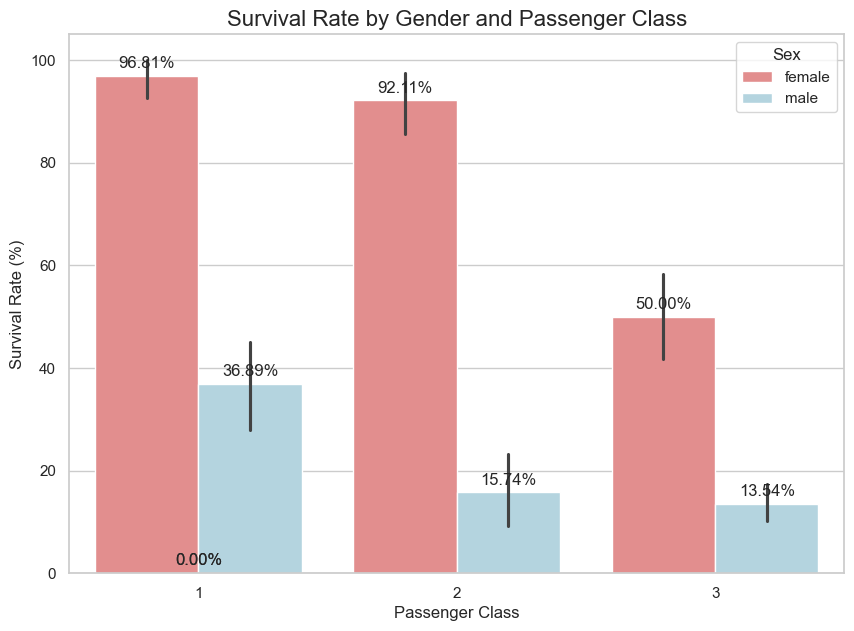

In [62]:
# --- Data Visualization with Seaborn ---
# Set the visual style of the plots
sns.set_theme(style="whitegrid")

# Create a new figure for the plot with a specific size
plt.figure(figsize=(10, 7))

# Create the grouped bar plot using seaborn's barplot function.
# x='Pclass': Passenger class will be on the x-axis.
# y='Survived': The value to be aggregated.
# hue='Sex': This creates separate bars for each gender within each passenger class.
# data=df: Specifies the DataFrame to use.
# estimator: A function to apply to each subgroup. We use a lambda function
#            to calculate the percentage of survivors (sum of '1's / total count * 100).
# palette: Sets the colors for the 'female' and 'male' bars.
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df,
                 estimator=lambda x: sum(x) * 100.0 / len(x),
                 palette={'female': 'lightcoral', 'male': 'lightblue'})

# Set the title and labels for clarity
ax.set_title('Survival Rate by Gender and Passenger Class', fontsize=16)
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Survival Rate (%)', fontsize=12)

# Set the y-axis limit to go from 0 to 105 to give space for labels
ax.set(ylim=(0, 105))

# Add the percentage labels on top of each bar for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()


In [63]:
# The 'Age' column has missing values. We'll fill them with the median age.
# Median is often a better choice than mean for skewed distributions like age.
median_age = train_df['Age'].median()
# The following line is updated to avoid the FutureWarning
train_df['Age'] = train_df['Age'].fillna(median_age)
print(f"--- Analysis of Age ---")
print(f"Missing 'Age' values filled with median age: {median_age:.2f}\n")

--- Analysis of Age ---
Missing 'Age' values filled with median age: 28.00



Generating KDE plot to show the relationship between Age and Survival...


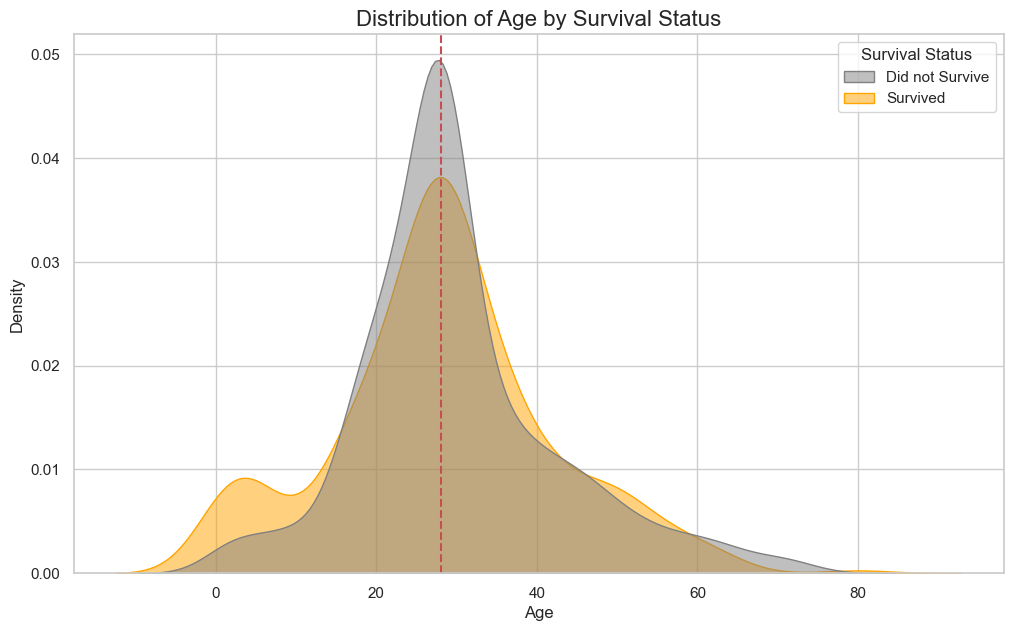

In [64]:
# --- Visualization 2: KDE Plot for Age and Survival ---
print("Generating KDE plot to show the relationship between Age and Survival...")
plt.figure(figsize=(12, 7))

# Create a temporary column for clearer legend labels
train_df['Survival Status'] = train_df['Survived'].map({0: 'Did not Survive', 1: 'Survived'})

# Create a Kernel Density Estimate plot
# hue is now mapped to the new 'Survival Status' column for automatic, clear labels.
ax = sns.kdeplot(data=train_df, x='Age', hue='Survival Status',
                  multiple='layer', common_norm=False,
                  palette={'Did not Survive': 'gray', 'Survived': 'orange'},
                  fill=True, alpha=0.5)

# Set the title and labels
ax.set_title('Distribution of Age by Survival Status', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Add a vertical line at the median age for reference
plt.axvline(median_age, color='r', linestyle='--', label=f'Median Age ({median_age:.2f})')

# By calling legend() on the axes object (ax2), we ensure that it gathers
# all labeled artists associated with that plot, including those created
# by seaborn's 'hue' and the manually added 'axvline'.

# Display the plot
plt.show()


In [65]:
# --- Analysis 3: Impact of Family Size on Survival ---
# Engineer the 'FamilySize' feature by adding SibSp, Parch, and 1 (for the passenger themselves).
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
# Calculate survival rates based on the new FamilySize feature.
family_survival_rates = train_df.groupby('FamilySize')['Survived'].mean() * 100
print("Survival Rates (%) by Family Size:")
print(family_survival_rates)

Survival Rates (%) by Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64



Generating bar plot to show the relationship between Family Size and Survival...


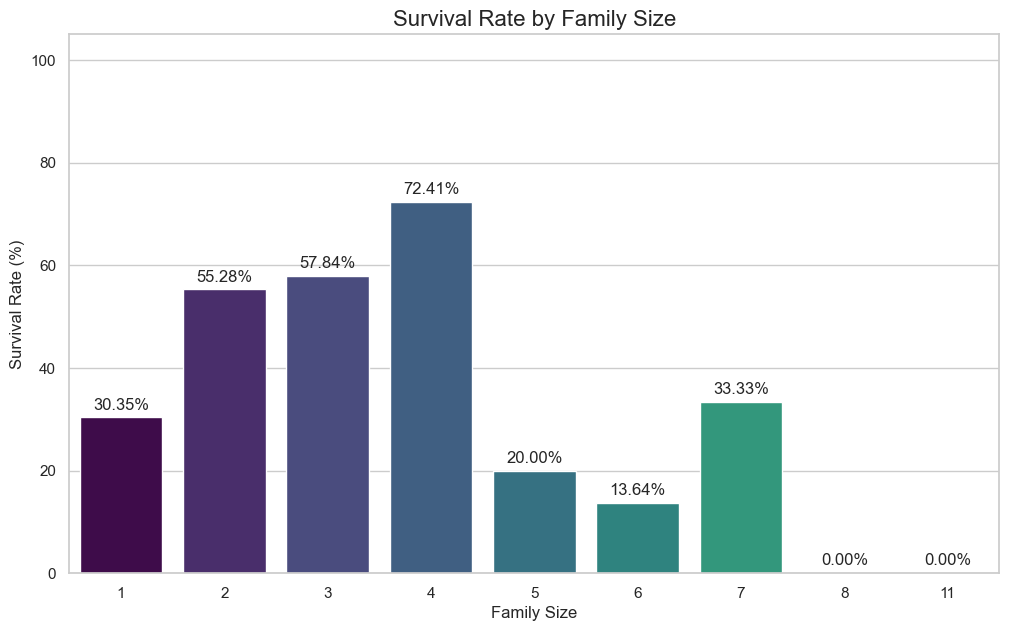

In [66]:
print("\nGenerating bar plot to show the relationship between Family Size and Survival...")
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=family_survival_rates.index, y=family_survival_rates.values,
                      hue=family_survival_rates.index, palette='viridis', legend=False)

# Set the title and labels
ax.set_title('Survival Rate by Family Size', fontsize=16)
ax.set_xlabel('Family Size', fontsize=12)
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set(ylim=(0, 105))

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

plt.show()